In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
! ls processed/

aid_589039_clinically_relevant.csv  drugbank_processed.csv
carbon-mangels_2011.csv		    flockheart.csv
CHEMBL1142817.csv		    xin_xu_ncats_adme.csv
chembl_active.csv


In [3]:
aid_589 = pd.read_csv("./processed/aid_589039_clinically_relevant.csv")
aid_589.head(2)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Standard Type,Activity Comment,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,1,103164548.0,5284616.0,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,COC1C(=O)C(C)C[C@H](C)/C=C/C=C/C=C(\C)[C@@H](O...,DVSZTYJRXBBIFA-FBAQEZMUSA-N,aid_589039_clinically_relevant,assay,substrate
1,2,103164549.0,445643.0,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,C=CCC1=CC(C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)...,SLUYGGAVUSVJOT-VZCWQGFJSA-N,aid_589039_clinically_relevant,assay,substrate


In [4]:
carbon_mangels = pd.read_csv("./processed/carbon-mangels_2011.csv")
carbon_mangels.head(2)

,common_name,SMILES,Active,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,abacavir,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,0,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,MCGSCOLBFJQGHM-SCZZXKLOSA-N,carbon-mangels_2011,assay,substrate
1,abecarnil,COCc1c(C(=O)OC(C)C)ncc2[nH]c3ccc(OCc4ccccc4)cc...,0,COCc1c(C(=O)OC(C)C)ncc2[nH]c3ccc(OCc4ccccc4)cc...,RLFKILXOLJVUNF-UHFFFAOYSA-N,carbon-mangels_2011,assay,substrate


In [5]:
chembl_clin = pd.read_csv("./processed/CHEMBL1142817.csv")
chembl_clin.head(2)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,CHEMBL839,CARTEOLOL,4.0,292.38,0.0,1.70,Carteolol,CC(C)(C)NCC(O)COc1cccc2c1CCC(=O)N2,Log 1/Km,'=',...,2005,NaN,NaN,NaN,NaN,CC(C)(C)NCC(O)COc1cccc2c1CCC(=O)N2,LWAFSWPYPHEXKX-UHFFFAOYSA-N,CHEMBL1142817,assay,substrate
1,CHEMBL1423,PIMOZIDE,4.0,461.56,1.0,5.86,SID56422165,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,Log 1/Km,'=',...,2005,NaN,NaN,NaN,NaN,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,CHEMBL1142817,assay,substrate


In [6]:
drugbank = pd.read_csv("./processed/drugbank_processed.csv")
drugbank.head(2)

,common_name,SMILES,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active
0,Indinavir,CC(C)(C)NC(=O)[C@@H]1CN(CCN1C[C@H](C[C@@H](CC2...,CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1C[C@@H](O)CC(...,CBVCZFGXHXORBI-IXVTTXLYSA-N,drugbank,substrate,True
1,Lovastatin,CC[C@H](C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([...,CCC(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@...,PCZOHLXUXFIOCF-SGFUJYLFSA-N,drugbank,substrate,True


In [7]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.head(2)

,Drug,SMILES,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active
0,abemaciclib,CCN1CCN(CC1)CC2=CN=C(C=C2)NC3=NC=C(C(=N3)C4=CC...,CCN1CCN(Cc2ccc(Nc3ncc(F)c(-c4cc(F)c5nc(C)n(C(C...,UZWDCWONPYILKI-UHFFFAOYSA-N,flockheart,substrate,True
1,abiraterone,C[C@]12CC[C@@H](CC1=CC[C@@H]3[C@@H]2CC[C@]4([C...,C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...,GZOSMCIZMLWJML-VJLLXTKPSA-N,flockheart,substrate,True


In [8]:
xin = pd.read_csv("./processed/xin_xu_ncats_adme.csv")
xin.head(2)

,SMILES,CYP2C9 Substrate Class,CYP2D6 Substrate Class,CYP3A4 Substrate Class,CYP2C9 Activity Class,CYP2D6 Activity Class,CYP3A4 Activity Class,CYP2C9 Inhibitor Class,CYP2D6 Inhibitor Class,CYP3A4_ Inhibitor Class,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,CC(C)(C)C1=C(O)C=CC(O)=C1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,CC(C)(C)c1cc(O)ccc1O,BGNXCDMCOKJUMV-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate
1,OC(=O)C\C(=C/C(O)=O)C(O)=O,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN,O=C(O)C=C(CC(=O)O)C(=O)O,GTZCVFVGUGFEME-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate


In [9]:
fda = pd.read_csv("./FDA/fda.csv")

# Chembl

There is only a small set of compounds in ChEMBL with substrate activity explicitly marked 

In [10]:
chembl_actives = pd.read_csv("processed/chembl_active.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type,dataset,active
0,NS(=O)(=O)Cc1noc2ccccc12,UBQNRHZMVUUOMG-UHFFFAOYSA-N,ZONISAMIDE,substrate,ChEMBL_curated,True
1,Oc1cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2[nH]1,CARRCRVKWDEWCD-UHFFFAOYSA-N,ZIPRASIDONE,substrate,ChEMBL_curated,True
2,CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(...,GBABOYUKABKIAF-IELIFDKJSA-N,VINORELBINE,substrate,ChEMBL_curated,True
3,CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)[C@@](...,OGWKCGZFUXNPDA-XQKSVPLYSA-N,VINCRISTINE,substrate,ChEMBL_curated,True
4,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...,JXLYSJRDGCGARV-CFWMRBGOSA-N,VINBLASTINE,substrate,ChEMBL_curated,True


In [11]:
combined_literature = pd.concat([fda,aid_589, carbon_mangels, chembl_clin, drugbank, flockheart, xin, chembl_actives])
combined_literature

,SMILES,active,common_name,action_type,FDA_recommended,dataset,INCHIKEY,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,...,Drug,CYP2C9 Substrate Class,CYP2D6 Substrate Class,CYP3A4 Substrate Class,CYP2C9 Activity Class,CYP2D6 Activity Class,CYP3A4 Activity Class,CYP2C9 Inhibitor Class,CYP2D6 Inhibitor Class,CYP3A4_ Inhibitor Class
0,CC1=NC=C2N1C3=C(C=C(C=C3)Cl)C(=NC2)C4=CC=CC=C4F,True,midazolam,substrate,True,FDA,DDLIGBOFAVUZHB-UHFFFAOYSA-N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CC1=NN=C2N1C3=C(C=C(C=C3)Cl)C(=NC2)C4=CC=CC=C4Cl,True,triazolam,substrate,True,FDA,JOFWLTCLBGQGBO-UHFFFAOYSA-N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=CC...,True,testosterone,substrate,True,MUMGGOZAMZWBJJ-DYKIIFRCSA-N,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,substrate,NaN,aid_589039_clinically_relevant,DVSZTYJRXBBIFA-FBAQEZMUSA-N,1.0,103164548.0,5284616.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,substrate,NaN,aid_589039_clinically_relevant,SLUYGGAVUSVJOT-VZCWQGFJSA-N,2.0,103164549.0,445643.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,True,AMLODIPINE,substrate,NaN,ChEMBL_curated,YMDXSGBNCBQYGC-UHFFFAOYSA-N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,True,ALPRAZOLAM,substrate,NaN,ChEMBL_curated,VREFGVBLTWBCJP-UHFFFAOYSA-N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,True,ALFUZOSIN,substrate,NaN,ChEMBL_curated,WNMJYKCGWZFFKR-UHFFFAOYSA-N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,True,ALFENTANIL,substrate,NaN,ChEMBL_curated,IDBPHNDTYPBSNI-UHFFFAOYSA-N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
combined_literature.INCHIKEY.isna().sum()

np.int64(23)

In [13]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [14]:
# clean up a bit

In [15]:
cols = combined_literature.columns

In [16]:
keepcols = ["CANONICAL_SMILES", "INCHIKEY", "dataset", "action_type", "active", "common_name"]

In [17]:
combined_literature_clean = combined_literature[keepcols]

In [18]:
combined_literature_clean["active"] = True

/tmp/ipykernel_34329/1528387074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_literature_clean["active"] = True


In [19]:
combined_literature_clean

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name
0,NaN,DDLIGBOFAVUZHB-UHFFFAOYSA-N,FDA,substrate,True,midazolam
1,NaN,JOFWLTCLBGQGBO-UHFFFAOYSA-N,FDA,substrate,True,triazolam
0,COC1C(=O)C(C)C[C@H](C)/C=C/C=C/C=C(\C)[C@@H](O...,DVSZTYJRXBBIFA-FBAQEZMUSA-N,aid_589039_clinically_relevant,substrate,True,NaN
1,C=CCC1=CC(C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)...,SLUYGGAVUSVJOT-VZCWQGFJSA-N,aid_589039_clinically_relevant,substrate,True,NaN
2,O=C1CC2(CCCC2)CC(=O)N1CCCCN1CCN(c2ncccn2)CC1,QWCRAEMEVRGPNT-UHFFFAOYSA-N,aid_589039_clinically_relevant,substrate,True,NaN
...,...,...,...,...,...,...
112,CCOC(=O)C1=C(COCCN)N=C(C)C(C(=O)OC)C1c1ccccc1Cl,YMDXSGBNCBQYGC-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,AMLODIPINE
113,Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NC2,VREFGVBLTWBCJP-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,ALPRAZOLAM
114,COc1cc2nc(N(C)CCCNC(=O)C3CCCO3)nc(N)c2cc1OC,WNMJYKCGWZFFKR-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,ALFUZOSIN
115,CCC(=O)N(c1ccccc1)C1(COC)CCN(CCn2nnn(CC)c2=O)CC1,IDBPHNDTYPBSNI-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,ALFENTANIL


In [20]:
combined_literature_clean.INCHIKEY.duplicated().sum()

np.int64(1193)

In [21]:
combined_literature_clean

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name
0,NaN,DDLIGBOFAVUZHB-UHFFFAOYSA-N,FDA,substrate,True,midazolam
1,NaN,JOFWLTCLBGQGBO-UHFFFAOYSA-N,FDA,substrate,True,triazolam
0,COC1C(=O)C(C)C[C@H](C)/C=C/C=C/C=C(\C)[C@@H](O...,DVSZTYJRXBBIFA-FBAQEZMUSA-N,aid_589039_clinically_relevant,substrate,True,NaN
1,C=CCC1=CC(C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)...,SLUYGGAVUSVJOT-VZCWQGFJSA-N,aid_589039_clinically_relevant,substrate,True,NaN
2,O=C1CC2(CCCC2)CC(=O)N1CCCCN1CCN(c2ncccn2)CC1,QWCRAEMEVRGPNT-UHFFFAOYSA-N,aid_589039_clinically_relevant,substrate,True,NaN
...,...,...,...,...,...,...
112,CCOC(=O)C1=C(COCCN)N=C(C)C(C(=O)OC)C1c1ccccc1Cl,YMDXSGBNCBQYGC-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,AMLODIPINE
113,Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NC2,VREFGVBLTWBCJP-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,ALPRAZOLAM
114,COc1cc2nc(N(C)CCCNC(=O)C3CCCO3)nc(N)c2cc1OC,WNMJYKCGWZFFKR-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,ALFUZOSIN
115,CCC(=O)N(c1ccccc1)C1(COC)CCN(CCn2nnn(CC)c2=O)CC1,IDBPHNDTYPBSNI-UHFFFAOYSA-N,ChEMBL_curated,substrate,True,ALFENTANIL


In [22]:
appears = combined_literature_clean.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AAAQFGUYHFJNHI-GOSISDBHSA-N,1
AAAQFGUYHFJNHI-SFHVURJKSA-N,1
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,1
AADVZSXPNRLYLV-IQCVEUMDSA-N,1
...,...
ZZUKALQMHNSWTK-UHFFFAOYSA-N,1
ZZVGLDBDDYESAB-UHFFFAOYSA-N,1
ZZVUWRFHKOJYTH-UHFFFAOYSA-N,2


In [23]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

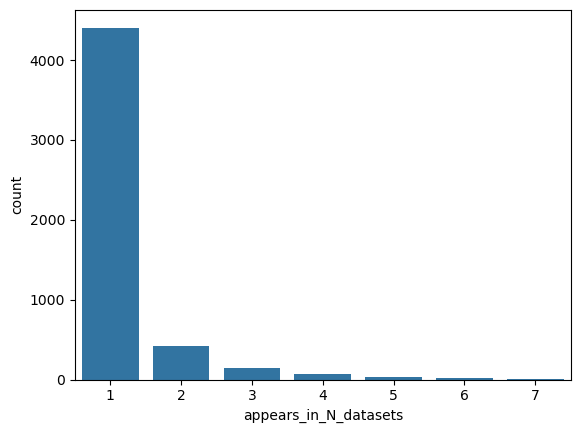

In [24]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [25]:
combined_literature_clean_w_counts = combined_literature_clean.merge(appears, on="INCHIKEY")


In [26]:
combined_literature_clean_w_counts.sort_values("appears_in_N_datasets", ascending=False)

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets
16,CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1C[C@@H](O)CC(...,CBVCZFGXHXORBI-IXVTTXLYSA-N,aid_589039_clinically_relevant,substrate,True,NaN,7
15,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,aid_589039_clinically_relevant,substrate,True,NaN,7
1681,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,flockheart,substrate,True,NaN,7
0,NaN,DDLIGBOFAVUZHB-UHFFFAOYSA-N,FDA,substrate,True,midazolam,7
6193,CC(C)c1nc(CN(C)C(=O)NC(C(=O)N[C@@H](Cc2ccccc2)...,NCDNCNXCDXHOMX-BWGGSIGWSA-N,ChEMBL_curated,substrate,True,RITONAVIR,7
...,...,...,...,...,...,...,...
1811,C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc...,NXQKSXLFSAEQCZ-SFHVURJKSA-N,flockheart,substrate,True,NaN,1
1820,CC[C@H]1OC(=O)C(C)C(=O)C(C)[C@@H](O[C@@H]2O[C@...,LJVAJPDWBABPEJ-OYXWVTGBSA-N,flockheart,substrate,True,NaN,1
1821,CCC1OC(=O)C(C)C(=O)C(C)C(OC2OC(C)CC(N(C)C)C2O)...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,flockheart,substrate,True,NaN,1
1822,CC[C@@H]1OC(=O)C(C)C(=O)C(C)[C@@H](O[C@@H]2O[C...,LJVAJPDWBABPEJ-JGFFHTBASA-N,flockheart,substrate,True,NaN,1


In [27]:
df_dummies = pd.get_dummies(combined_literature_clean_w_counts['dataset'], prefix='dataset').join(combined_literature_clean_w_counts["INCHIKEY"])
df_dummies

,dataset_CHEMBL1142817,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,INCHIKEY
0,False,False,True,False,False,False,False,False,DDLIGBOFAVUZHB-UHFFFAOYSA-N
1,False,False,True,False,False,False,False,False,JOFWLTCLBGQGBO-UHFFFAOYSA-N
2,False,False,False,False,True,False,False,False,DVSZTYJRXBBIFA-FBAQEZMUSA-N
3,False,False,False,False,True,False,False,False,SLUYGGAVUSVJOT-VZCWQGFJSA-N
4,False,False,False,False,True,False,False,False,QWCRAEMEVRGPNT-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...
6278,False,True,False,False,False,False,False,False,YMDXSGBNCBQYGC-UHFFFAOYSA-N
6279,False,True,False,False,False,False,False,False,VREFGVBLTWBCJP-UHFFFAOYSA-N
6280,False,True,False,False,False,False,False,False,WNMJYKCGWZFFKR-UHFFFAOYSA-N
6281,False,True,False,False,False,False,False,False,IDBPHNDTYPBSNI-UHFFFAOYSA-N


In [28]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [29]:
combined_literature_clean_w_counts = combined_literature_clean_w_counts.merge(df_result, on="INCHIKEY")

In [30]:
combined_literature_clean_w_counts.sort_values("appears_in_N_datasets", ascending=False, inplace=True)
combined_literature_clean_w_counts

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart
16,CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1C[C@@H](O)CC(...,CBVCZFGXHXORBI-IXVTTXLYSA-N,aid_589039_clinically_relevant,substrate,True,NaN,7,True,True,False,True,True,True,True,True
15,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,aid_589039_clinically_relevant,substrate,True,NaN,7,True,True,False,True,True,True,True,True
1681,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,flockheart,substrate,True,NaN,7,True,True,False,True,True,True,True,True
0,NaN,DDLIGBOFAVUZHB-UHFFFAOYSA-N,FDA,substrate,True,midazolam,7,False,True,True,True,True,True,True,True
6193,CC(C)c1nc(CN(C)C(=O)NC(C(=O)N[C@@H](Cc2ccccc2)...,NCDNCNXCDXHOMX-BWGGSIGWSA-N,ChEMBL_curated,substrate,True,RITONAVIR,7,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc...,NXQKSXLFSAEQCZ-SFHVURJKSA-N,flockheart,substrate,True,NaN,1,False,False,False,False,False,False,False,True
1820,CC[C@H]1OC(=O)C(C)C(=O)C(C)[C@@H](O[C@@H]2O[C@...,LJVAJPDWBABPEJ-OYXWVTGBSA-N,flockheart,substrate,True,NaN,1,False,False,False,False,False,False,False,True
1821,CCC1OC(=O)C(C)C(=O)C(C)C(OC2OC(C)CC(N(C)C)C2O)...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,flockheart,substrate,True,NaN,1,False,False,False,False,False,False,False,True
1822,CC[C@@H]1OC(=O)C(C)C(=O)C(C)[C@@H](O[C@@H]2O[C...,LJVAJPDWBABPEJ-JGFFHTBASA-N,flockheart,substrate,True,NaN,1,False,False,False,False,False,False,False,True


In [31]:
combined_literature_clean_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)


In [32]:
# fill common name from gropupby 
combined_literature_clean_w_counts['common_name'] = combined_literature_clean_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

/tmp/ipykernel_34329/3906258632.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_clean_w_counts['common_name'] = combined_literature_clean_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_34329/3906258632.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_clean_w_counts['common_name'] = combined_literature_clean_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [33]:
combined_literature_clean_w_counts.drop(columns=["dataset"], inplace=True)

In [34]:
fda_reccomends_mask = combined_literature_clean_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

1793    False
1787    False
880     False
879     False
3130    False
        ...  
932     False
931     False
926     False
3284    False
905     False
Name: INCHIKEY, Length: 6283, dtype: bool

In [35]:
combined_literature_clean_w_counts["FDA_recommended"] = fda_reccomends_mask

In [36]:
combined_literature_clean_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [40]:
combined_literature_clean_w_counts["inclusion_score"] = combined_literature_clean_w_counts["appears_in_N_datasets"].fillna(0)

In [41]:
combined_literature_clean_w_counts.sort_values("inclusion_score", inplace=True, ascending=False)

In [42]:
combined_literature_clean_w_counts.head(20)

,CANONICAL_SMILES,INCHIKEY,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,FDA_recommended,inclusion_score
1793,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,substrate,True,Saquinavir,7,True,True,False,True,True,True,True,True,False,7
1787,CC(C)c1nc(CN(C)C(=O)NC(C(=O)N[C@@H](Cc2ccccc2)...,NCDNCNXCDXHOMX-BWGGSIGWSA-N,substrate,True,Ritonavir,7,True,True,False,True,True,True,True,True,False,7
879,CC[C@H]1OC(=O)C(C)[C@@H](O[C@H]2C[C@@](C)(OC)[...,AGOYDEPGAOXOCK-WLLSWQJKSA-N,substrate,True,Clarithromycin,7,True,True,False,True,True,True,True,True,False,7
3130,CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1C[C@@H](O)CC(...,CBVCZFGXHXORBI-IXVTTXLYSA-N,substrate,True,Indinavir,7,True,True,False,True,True,True,True,True,False,7
502,Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2,DDLIGBOFAVUZHB-UHFFFAOYSA-N,substrate,True,midazolam,7,False,True,True,True,True,True,True,True,True,7
1775,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,substrate,True,Pimozide,7,True,True,False,True,True,True,True,True,False,7
1807,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,RYMZZMVNJRMUDD-HGQWONQESA-N,substrate,True,Simvastatin,7,True,True,False,True,True,True,True,True,False,7
1933,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,substrate,True,Carbamazepine,7,True,True,False,True,True,True,True,True,False,7
1665,Cc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1)=NC2,VREFGVBLTWBCJP-UHFFFAOYSA-N,substrate,True,Alprazolam,6,True,True,False,False,True,True,True,True,False,6
1671,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,XUKUURHRXDUEBC-KAYWLYCHSA-N,substrate,True,ATORVASTATIN,6,False,True,False,True,True,True,True,True,False,6


In [43]:
combined_literature_clean_w_counts.to_csv("./final/actives_final.csv", index=False)

In [44]:
combined_literature_clean_w_counts.action_type.value_counts()

action_type
substrate    5090
Name: count, dtype: int64